In [49]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# 设计低通 FIR 滤波器的频率响应
def design_lowpass_freq_response(cutoff_freq, num_samples, pass_band_mag, stop_band_mag):
    # 初始化频率响应
    H = np.zeros(num_samples, dtype=complex)

    freq_lists = np.linspace(0, 2 * np.pi, num_samples)
    
    # 设置通带和阻带的频率响应
    for k, frequency in enumerate(freq_lists):
        if abs(frequency) <= cutoff_freq or frequency >= 2 * np.pi - cutoff_freq:
            H[k] = pass_band_mag  # 通带幅值
        else:
            H[k] = stop_band_mag   # 阻带幅值
    # H = np.concatenate((H, np.flip(H[1 : -1])))
    return H, freq_lists

In [51]:
# 设计低通 FIR 滤波器的频率响应
def design_highpass_freq_response(cutoff_freq, num_samples, pass_band_mag, stop_band_mag):
    # 初始化频率响应
    H = np.zeros(num_samples, dtype=complex)

    freq_lists = np.linspace(0, 2 * np.pi, num_samples)
    
    # 设置通带和阻带的频率响应
    for k, frequency in enumerate(freq_lists):
        if abs(frequency) >= cutoff_freq and frequency <= 2 * np.pi - cutoff_freq:
            H[k] = pass_band_mag  # 通带幅值
        else:
            H[k] = stop_band_mag   # 阻带幅值
    # H = np.concatenate((H, np.flip(H[1 : -1])))
    return H, freq_lists

In [52]:
def idft(H, w):
    # N = len(H)
    # n = np.arange(N)
    # h = np.zeros(N, dtype=complex)
    # for i in range(N):
    #     for j in range(N):
    #         h[i] += H[j] * np.exp(1j * w[j] * i) / N
    
    # return h.real, n
    h = np.fft.ifft(H)
    h = np.fft.ifftshift(h)
    n = np.arange(len(h))
    return h, n



In [53]:
def dft(h):
    N = len(h)
    H = np.fft.fft(h)
    w = np.fft.fftfreq(N)
    return H , w

In [54]:
# 参数设定
cutoff_freq = 0.2 * np.pi  # 截止频率
pass_band_mag = 2          # 通带幅值
stop_band_mag = 0.1       # 阻带幅值
N1, N2 = 10, 20             # 频率采样点数

In [55]:
# 设计低通滤波器频率响应
H1, w1 = design_lowpass_freq_response(cutoff_freq, N1, pass_band_mag, stop_band_mag)
H2, w2 = design_lowpass_freq_response(cutoff_freq, N2 , pass_band_mag, stop_band_mag)

In [56]:
# 计算冲激响应
h1, n1 = idft(H1, w1)
h2, n2 = idft(H2, w2)

In [57]:
title1 = f'Low-pass FIR (N={N1})'
title2 = f'Low-pass FIR (N={N2})'

In [58]:
def plot_time_and_freq(h, H, title):
    plt.figure(figsize=(10, 6))

    # 绘制冲激响应
    plt.subplot(2, 1, 1)
    plt.stem(h)
    plt.title(f'Impulse Response: {title}')
    plt.grid()

    # 绘制频率响应
    w = np.linspace(0, 2 * np.pi, len(H))
    plt.subplot(2, 1, 2)
    plt.stem(w, H)
    plt.title(f'Frequency Response: {title}')
    plt.xlabel('Normalized Frequency (π rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.tight_layout()
    plt.show()
        

画 h1[n] and h2[n]

In [59]:
def plot_TwoSignal(x1, y1, x2, y2, title1 = '', title2 = ''):
    plt.figure(figsize=(12, 8))

    plt.stem(x1, y1, linefmt = 'r--',  label = title1)
    plt.stem(x2, y2, linefmt = 'g--',  label = title2)
    plt.xlabel("n")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

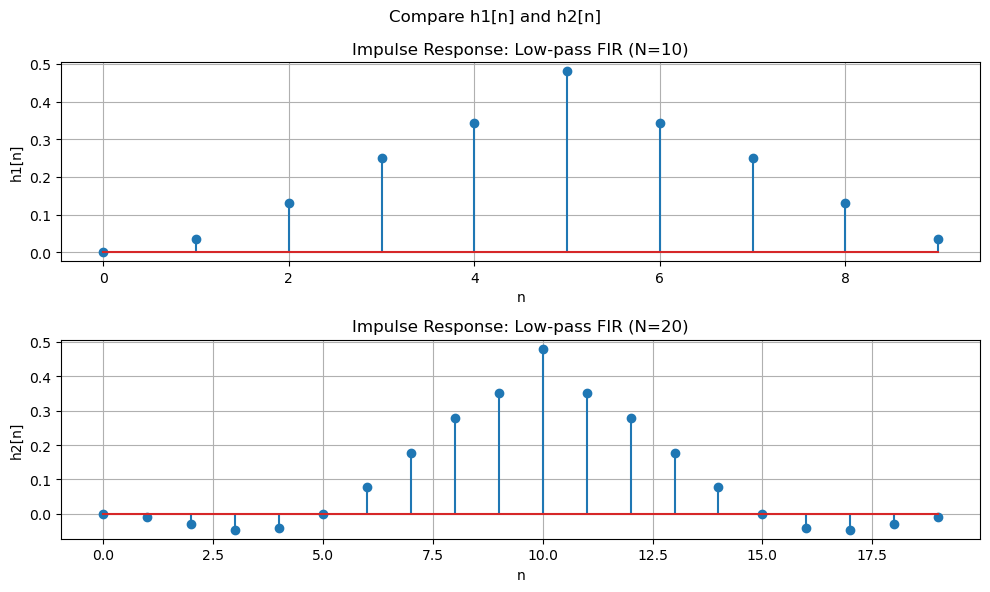

In [60]:
plt.figure(figsize=(10, 6))

plt.suptitle('Compare h1[n] and h2[n]')

plt.subplot(2, 1, 1)
plt.stem(h1)
plt.title(f'Impulse Response: {title1}')
plt.ylabel('h1[n]')
plt.xlabel('n')
plt.grid()

plt.subplot(2, 1, 2)
plt.stem(h2)
plt.title(f'Impulse Response: {title2}')
plt.ylabel('h2[n]')
plt.xlabel('n')
plt.grid()

plt.tight_layout()
plt.show()

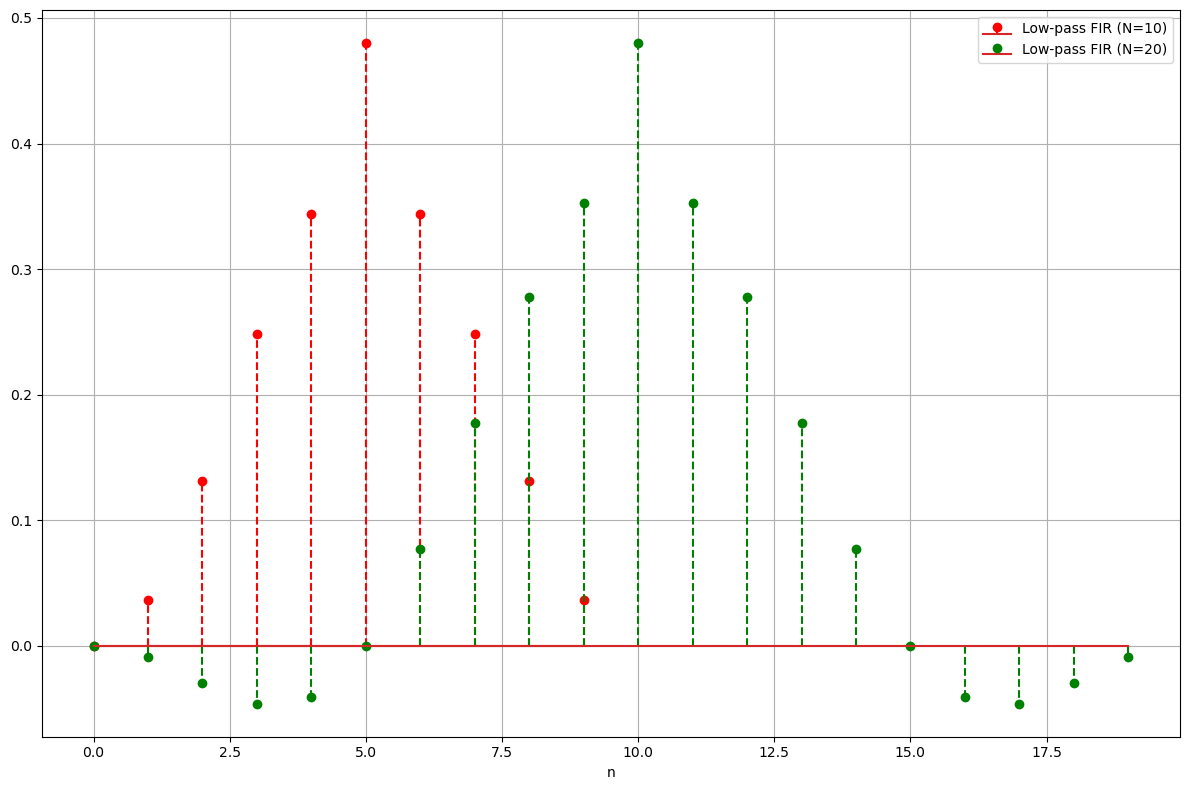

In [61]:
plot_TwoSignal(n1, h1, n2, h2, title1, title2)

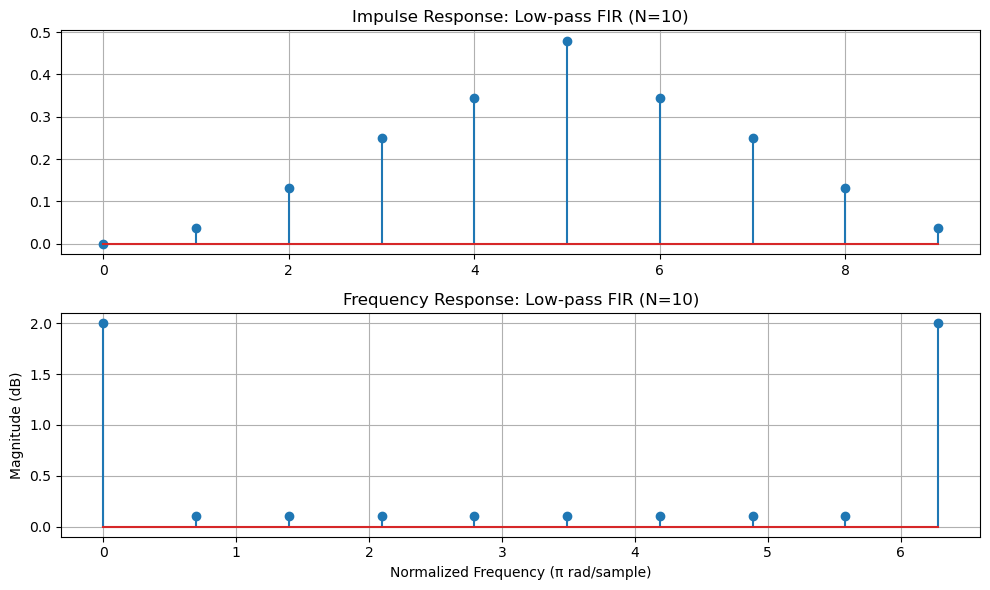

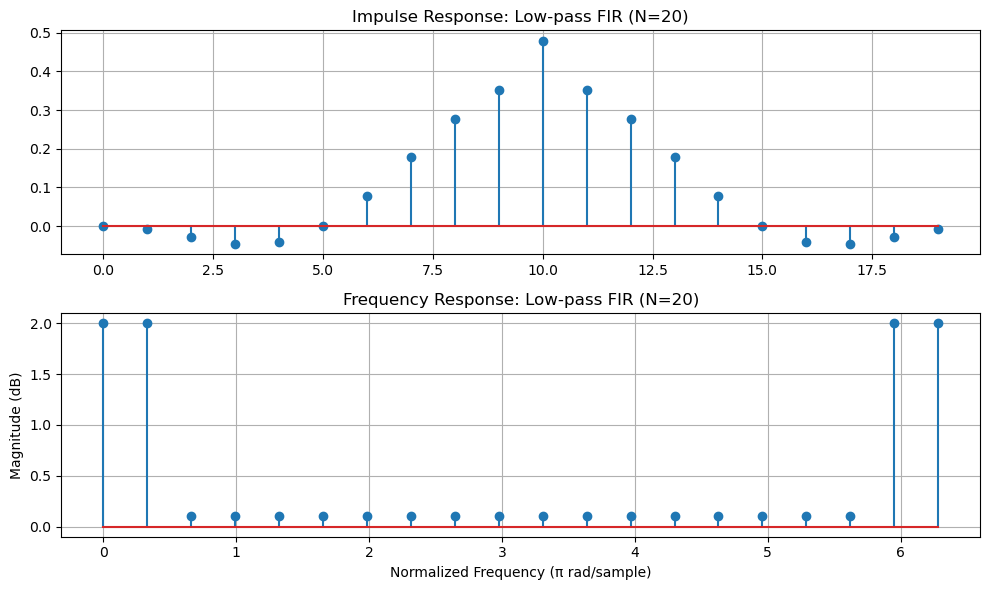

In [62]:
plot_time_and_freq(h1, H1, title1)
plot_time_and_freq(h2, H2, title2)

In [109]:
def my_freqz(b, a, N):

    w = np.linspace(-np.pi, np.pi, N)

    def cap_h_value(bz, az, z: complex):
        num = sum([bz[i] * z ** (-i) for i in range(len(bz))])
        den = sum([az[i] * z ** (-i) for i in range(len(az))])
        return num / den
    cap_hs = np.array([cap_h_value(b, a, np.exp(1j * omega)) for omega in w])
    return cap_hs, w  # values of H(w)

    M = len(b)
    omega = np.linspace(-np.pi, np.pi, N) 
    num = den = H = np.zeros(N, dtype=complex)
    
    for k in range(N):
        for n in range(M):
            num[k] += b[n] * np.exp(-1j * omega[k] * n) 
            den[k] += a[n] * np.exp(-1j * omega[k] * n)
        H[k] = num[k] / (den[k])
    return H, omega

In [110]:
def plot_time_and_freq1(h, w, H, title):
    plt.figure(figsize=(10, 6))

    # 绘制冲激响应
    plt.subplot(2, 1, 1)
    plt.stem(h)
    plt.title(f'Impulse Response: {title}')
    plt.grid()

    # 绘制频率响应
    plt.subplot(2, 1, 2)
    #plt.plot(w, np.abs(H))
    plt.stem(w, np.abs(H))
    plt.title(f'Frequency Response: {title}')
    plt.xlabel('Normalized Frequency (π rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.grid()

    plt.tight_layout()
    plt.show()
        

In [111]:
a1 = np.zeros(N1)
a1[0] = 1
a2 = np.zeros(N2)
a2[0] = 1
H_frf1, w1 = my_freqz(h1, [1], 512)
H_frf2, w2 = my_freqz(h2, [1], 512)

f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
f:\anaconda3\envs\prp\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


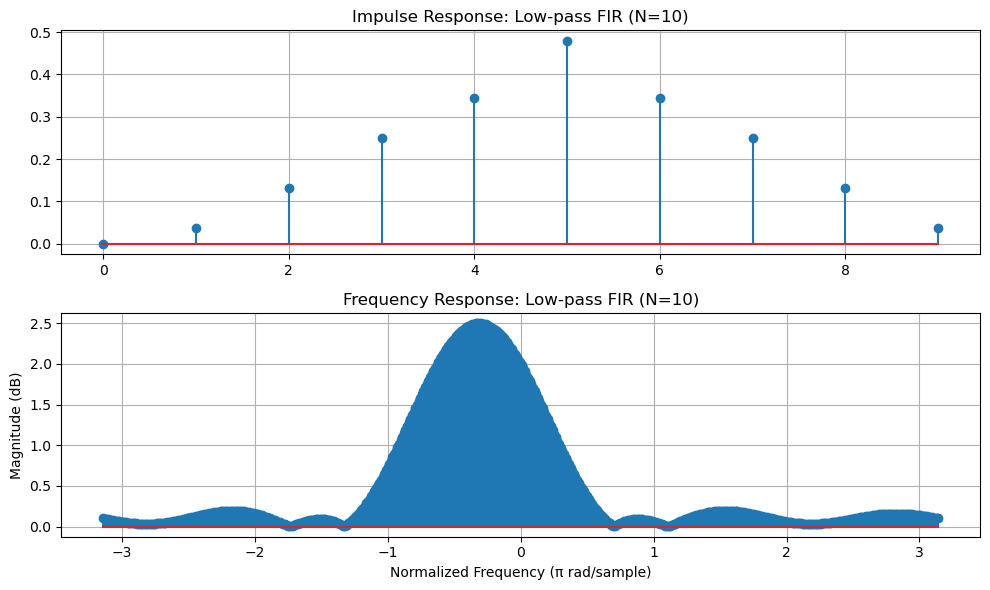

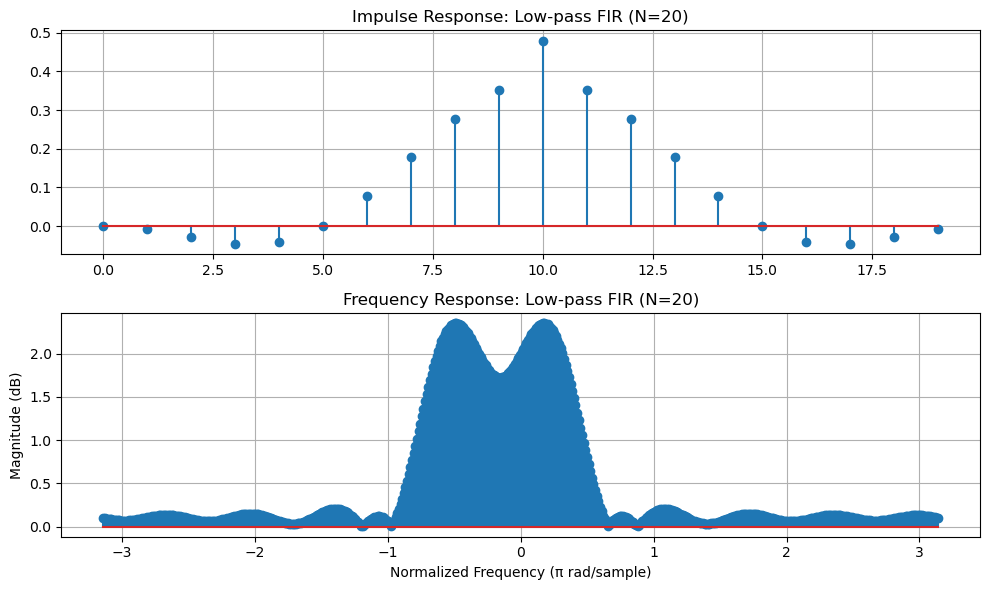

In [112]:
plot_time_and_freq1(h1, w1, H_frf1, title1)
plot_time_and_freq1(h2, w2, H_frf2, title2)

In [113]:
def plot_OneSignal_MagAndPha(x, y, title):
    plt.figure(figsize=(12, 8))
    plt.suptitle(title)

    plt.subplot(211)
    # plt.plot(x, np.abs(y))
    plt.stem(x, np.abs(y))
    plt.ylabel("Magnitude")
    plt.xlabel("w")
    plt.grid()

    plt.subplot(212)
    # plt.plot(x, np.angle(y))
    plt.stem(x, np.angle(y))
    plt.ylabel("Phase")
    plt.xlabel("w")
    plt.grid()

    plt.tight_layout()
    plt.show()

In [114]:
def plot_TwoSignal_MagAndPha(x1, y1, x2, y2, title1, title2):
    plt.figure(figsize=(12, 8))


    plt.subplot(211)
    # plt.plot(x, np.abs(y1), color = "red", linestyle = '--', label = title1)
    # plt.plot(x, np.abs(y2), color = "green", linestyle = '--', label = title2)
    plt.stem(x1, np.abs(y1), linefmt='r--', label = title1)
    plt.stem(x2, np.abs(y2), linefmt='g--', label = title2)
    plt.ylabel("Magnitude")
    plt.xlabel("w")
    plt.legend()
    plt.grid()

    plt.subplot(212)
    # plt.plot(x, np.angle(y1), color = "red", linestyle = '--', label = title1)
    # plt.plot(x, np.angle(y2), color = "green", linestyle = '--', label = title2)
    plt.stem(x1, np.angle(y1), linefmt='r--', label = title1)
    plt.stem(x2, np.angle(y2), linefmt='g--', label = title2)
    plt.ylabel("Phase")
    plt.xlabel("w")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

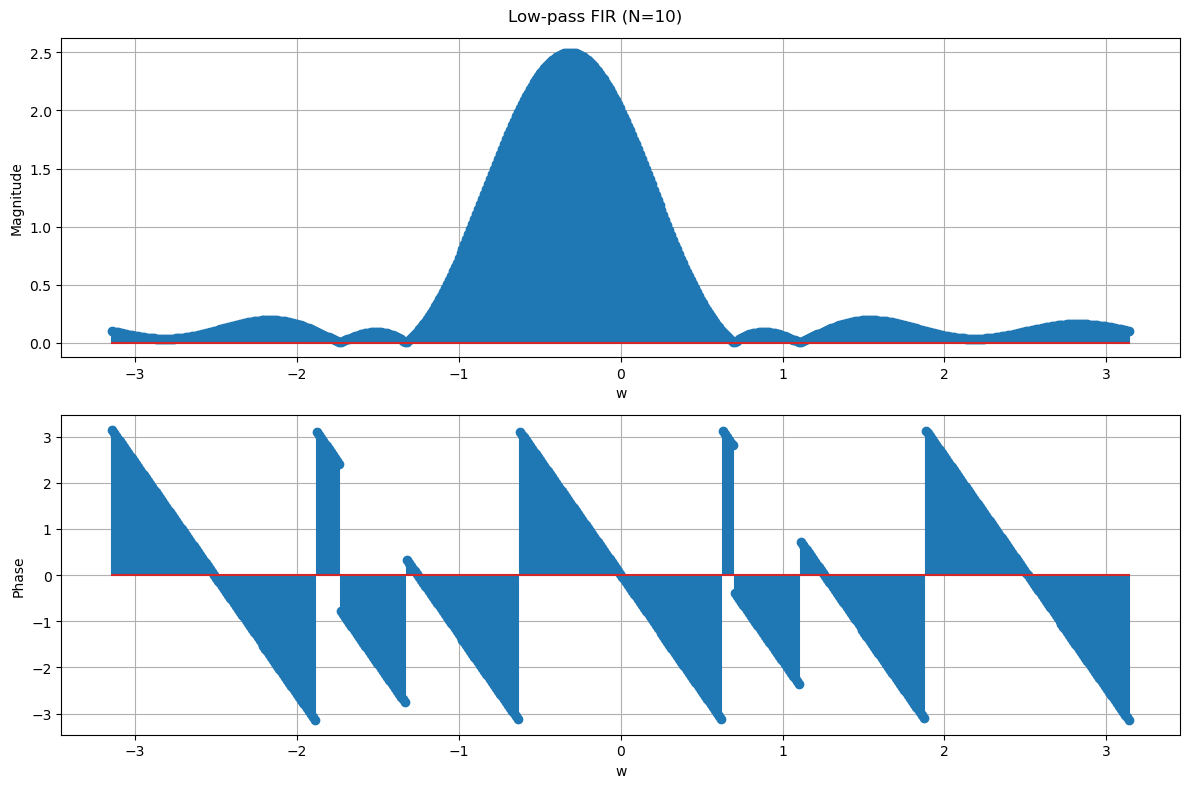

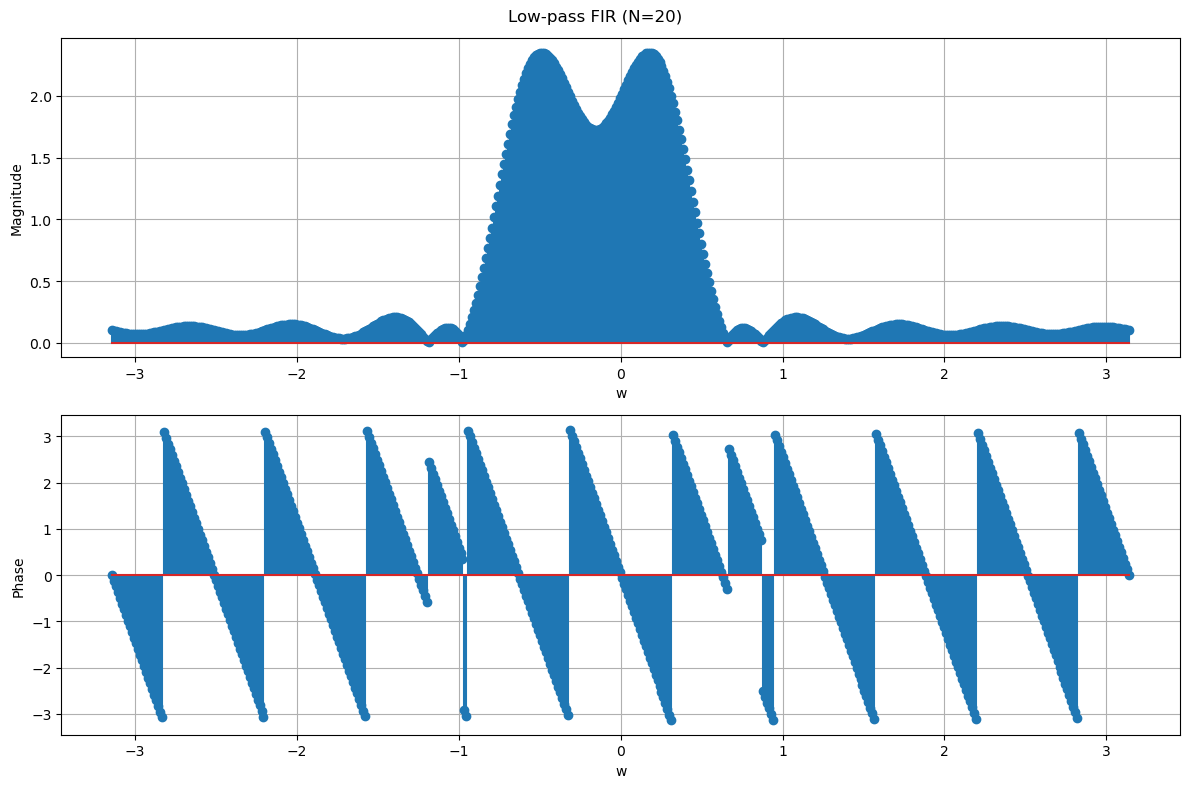

In [115]:
plot_OneSignal_MagAndPha(w1, H_frf1, title1)
plot_OneSignal_MagAndPha(w2, H_frf2, title2)

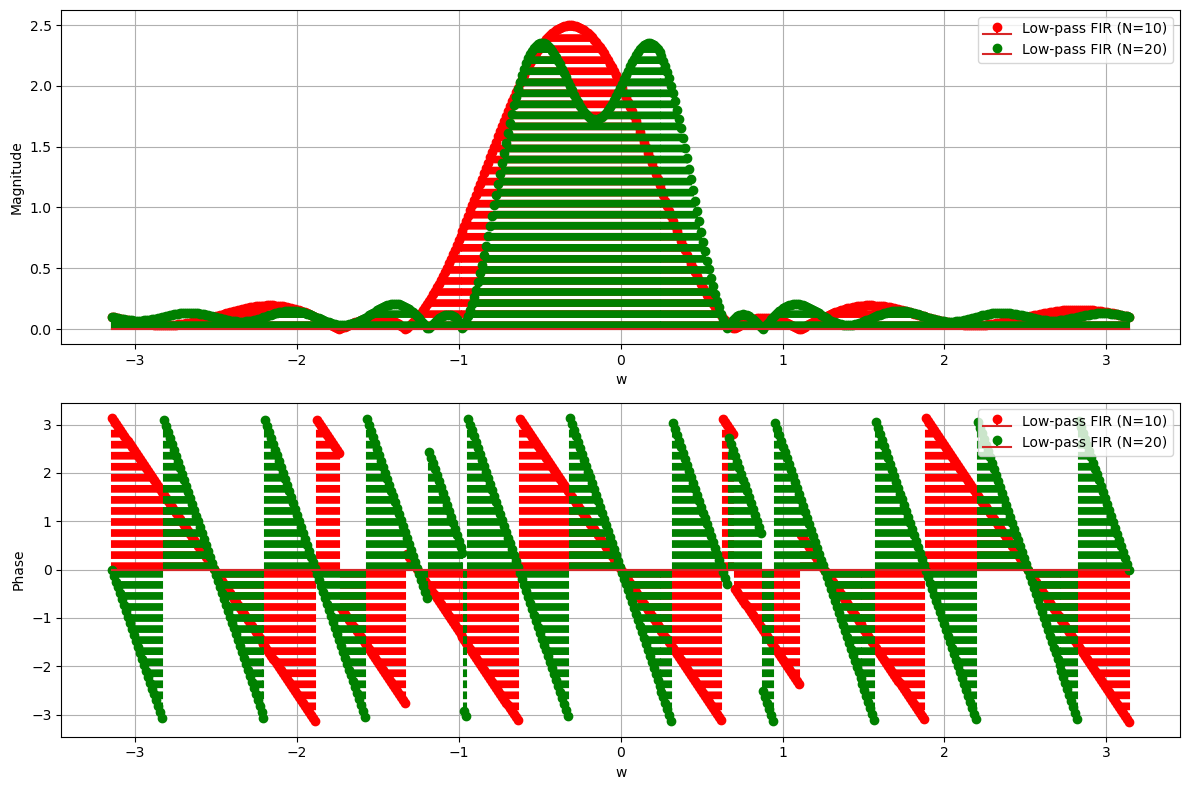

In [116]:
plot_TwoSignal_MagAndPha(w1, H_frf1, w2, H_frf2, title1, title2)

In [117]:
def rectangular_window(L):
    """
    生成一个矩形窗函数

    参数:
    L -- 窗函数的长度

    返回:
    window -- 矩形窗函数，长度为 L，高为 1
    """    
    #生成一个长度为 L 的数组，所有值为 1
    window = np.ones(L)
    return window


In [118]:
def kaiser_window(L, beta=14):
    """
    生成一个长度为 N 的时间数组 t，并在前 L 个样本上应用凯撒窗

    参数:
    N -- 时间数组的总长度
    L -- 窗函数的长度
    beta -- 凯撒窗的β参数，默认值为14

    返回:
    t -- 时间数组
    windowed_signal -- 应用凯撒窗后的信号
    """

    # 生成凯撒窗函数，长度为 L
    window = np.kaiser(L, beta)

    return window

In [121]:
N_samples = 100
L = 20
H3, w3 = design_highpass_freq_response(0.5 * np.pi, N_samples, 2, 0.1)
H4, w4 = design_highpass_freq_response(0.5 * np.pi, N_samples, 2, 0.1)
h3, n3 = idft(H3, w3)
h4, n4 = idft(H4, w4)
title3 = 'Rectangle_Window'
title4 = 'kaiser_window'


h3 = h3[len(h3) // 2 - L // 2 : len(h3) // 2 + L // 2] * rectangular_window(L)
h4 = h4[len(h4) // 2 - L // 2 : len(h4) // 2 + L // 2] * kaiser_window(L)
n3 = n3[:L]
n4 = n4[:L]

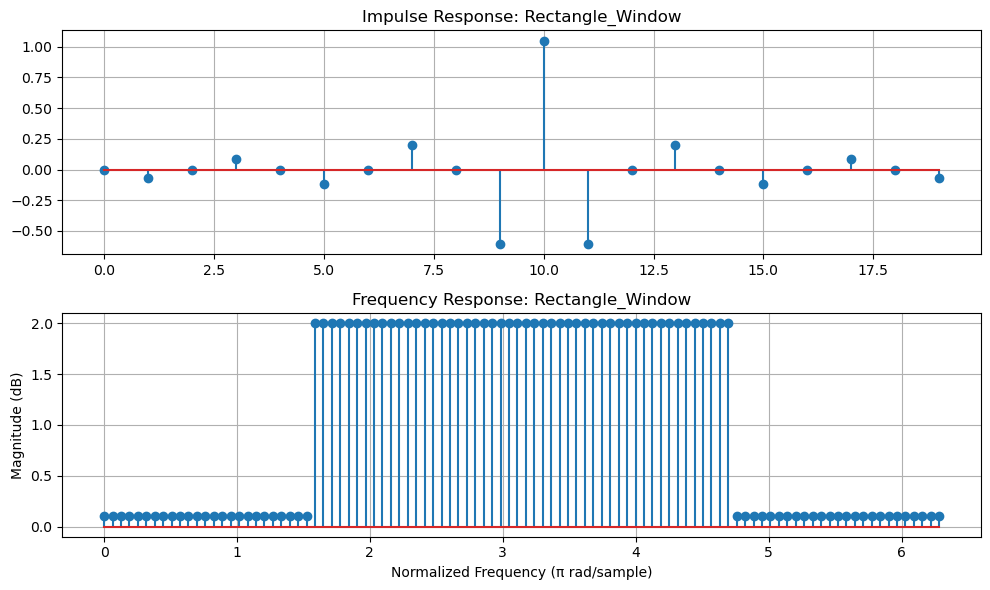

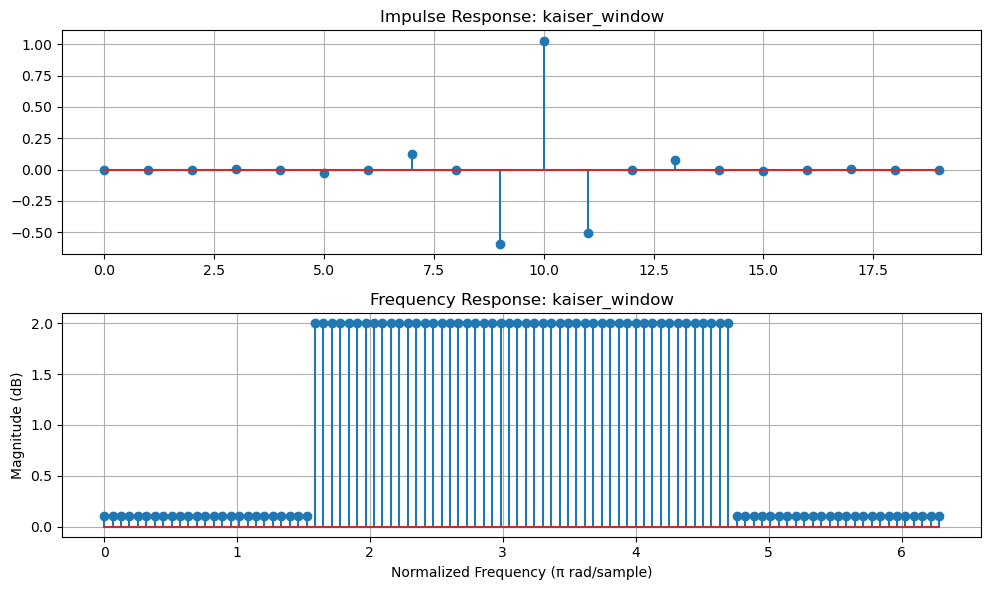

In [120]:
plot_time_and_freq(h3, H3, title3)
plot_time_and_freq(h4, H4, title4)

f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
f:\anaconda3\envs\prp\Lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


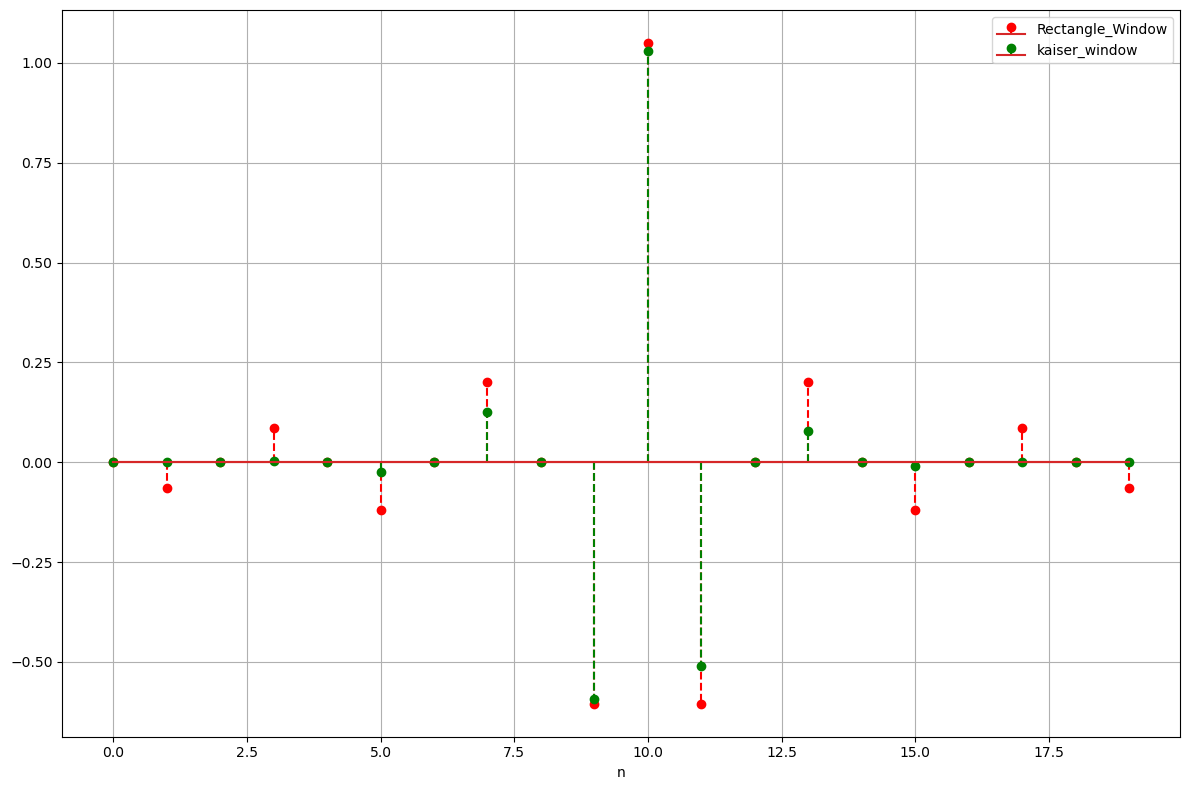

In [122]:
plot_TwoSignal(n3, h3, n4, h4, title3, title4)

In [125]:
a3 = np.zeros(N_samples)
a3[0] = 1
a4 = np.zeros(N_samples)
a4[0] = 1
H_frf3, w3 = my_freqz(h3, a3, 512)
H_frf4, w4 = my_freqz(h4, a4, 512)

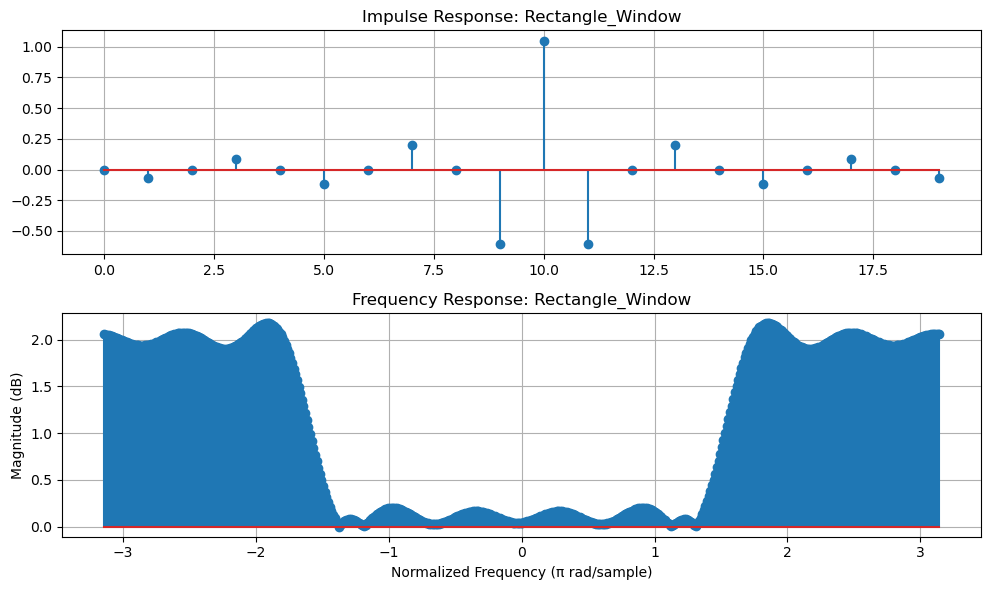

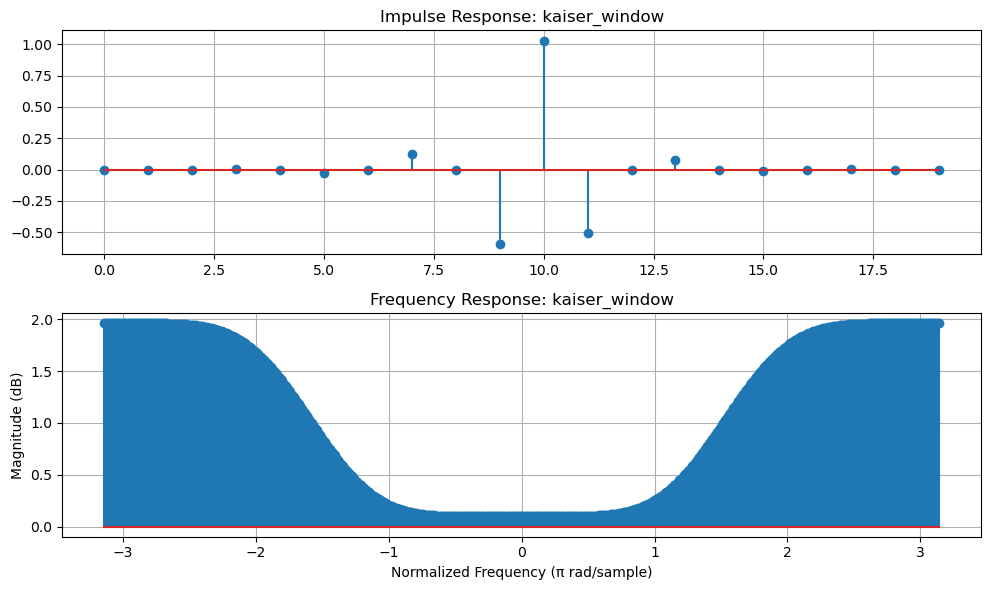

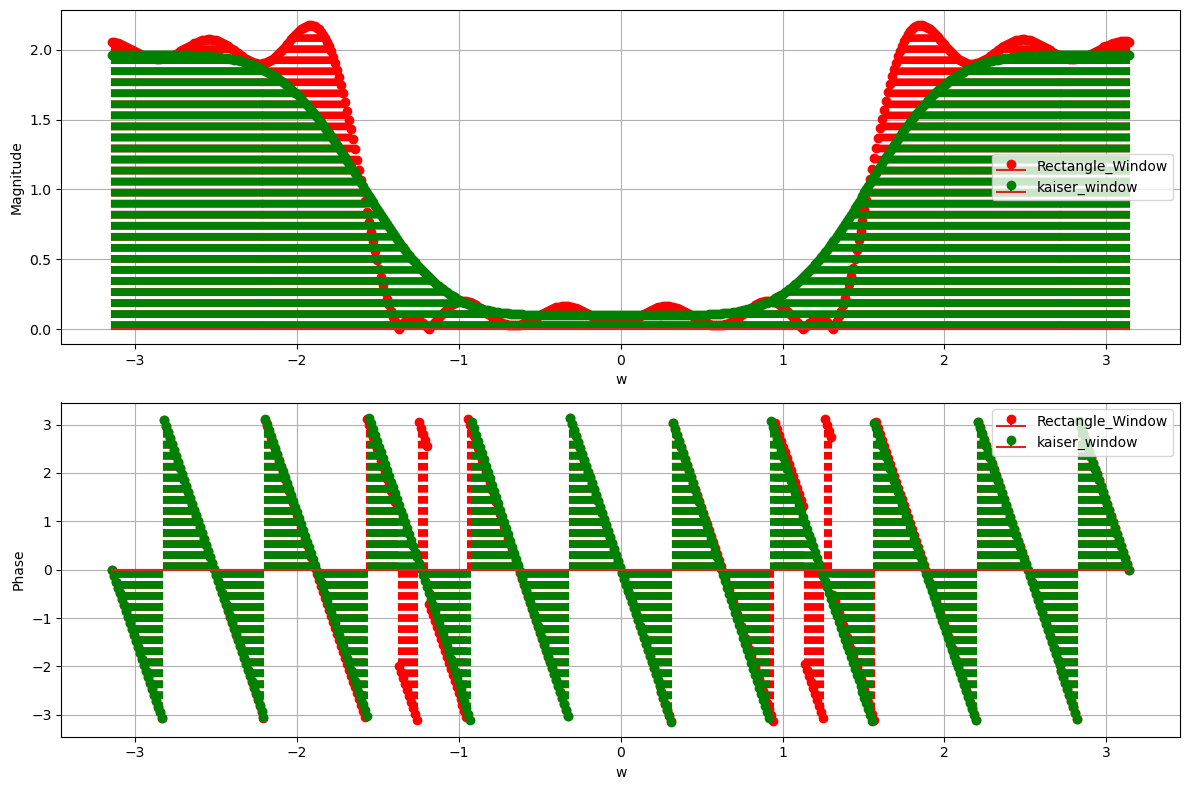

In [126]:
plot_time_and_freq1(h3, w3, H_frf3, title3)
plot_time_and_freq1(h4, w4, H_frf4, title4)
plot_TwoSignal_MagAndPha(w3, H_frf3, w4, H_frf4, title3, title4)

带标注


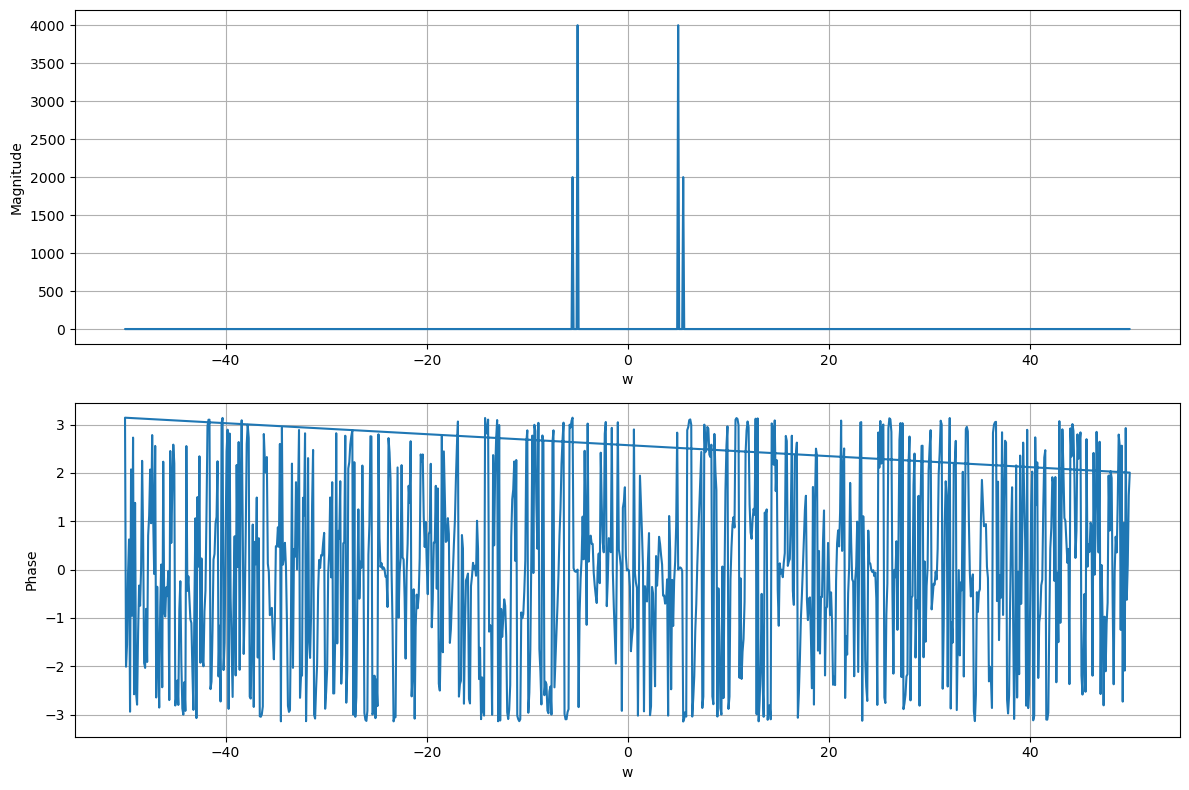

In [142]:
T = 0.01
fs = 100
t = np.linspace(-500 * T, 499 * T, 1000 )
A1 = 8
A2 = 4
f1 = 5
f2 = 5.5
x = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)

X, w = dft(x)

plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(w * fs, np.abs(X))
plt.ylabel("Magnitude")
plt.xlabel("w")
#plt.text(5.5, 150000, "f2=5.5")
#plt.text(5.0, 400000, "f1=5.0")
plt.grid()

plt.subplot(212)
plt.plot(w * fs, np.angle(X))
plt.ylabel("Phase")
plt.xlabel("w")
plt.grid()

plt.tight_layout()
plt.show()



In [128]:
def hamming_window(M):
    hamming = 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(M) / (M - 1))
    # 生成汉明窗
    return hamming

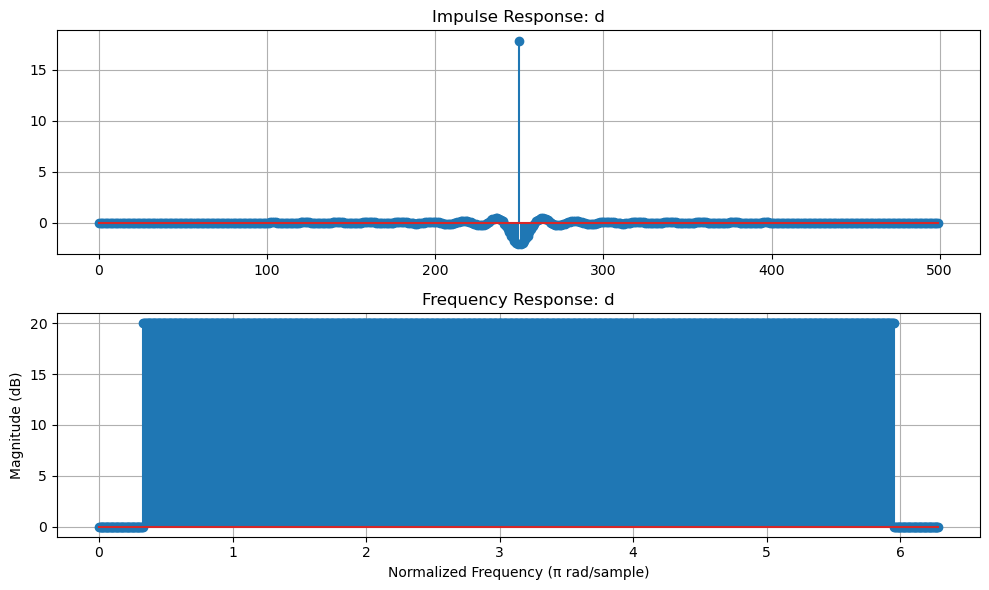

In [150]:
N_samples = 1000
H5, w5 = design_highpass_freq_response(5.25 / fs * np.pi * 2, N_samples, 20, 0)
h5, n5 = idft(H5, w5)
M = 500
h5 = h5[N_samples // 2 - M // 2 : N_samples // 2 + M // 2]
n5 = n5[N_samples // 2 - M // 2 : N_samples // 2 + M // 2]
h5 *= hamming_window(M)
plot_time_and_freq(h5, H5, "d")

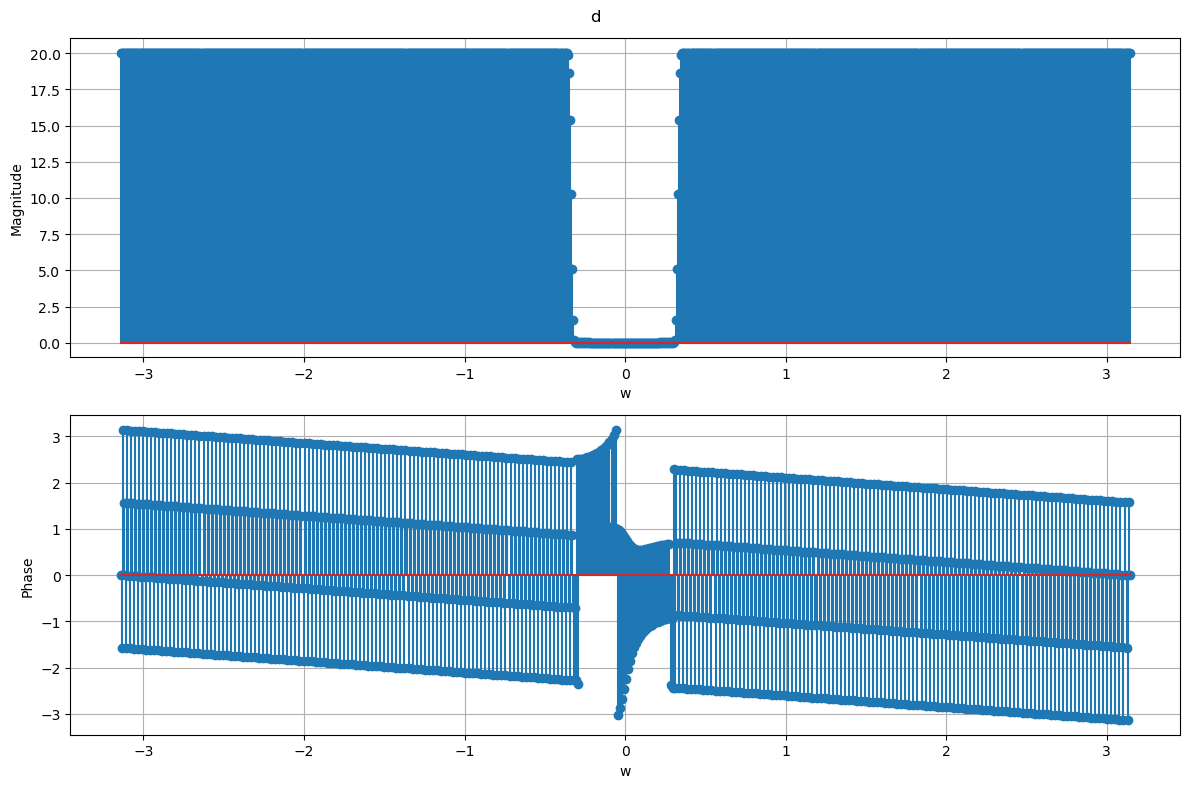

In [152]:
# a5 = np.zeros(N_samples)
# a5[0] = 1
a5 = [1]
H_frf5, w5 = my_freqz(h5, a5, N_samples)
plot_OneSignal_MagAndPha(w5, H_frf5, "d")

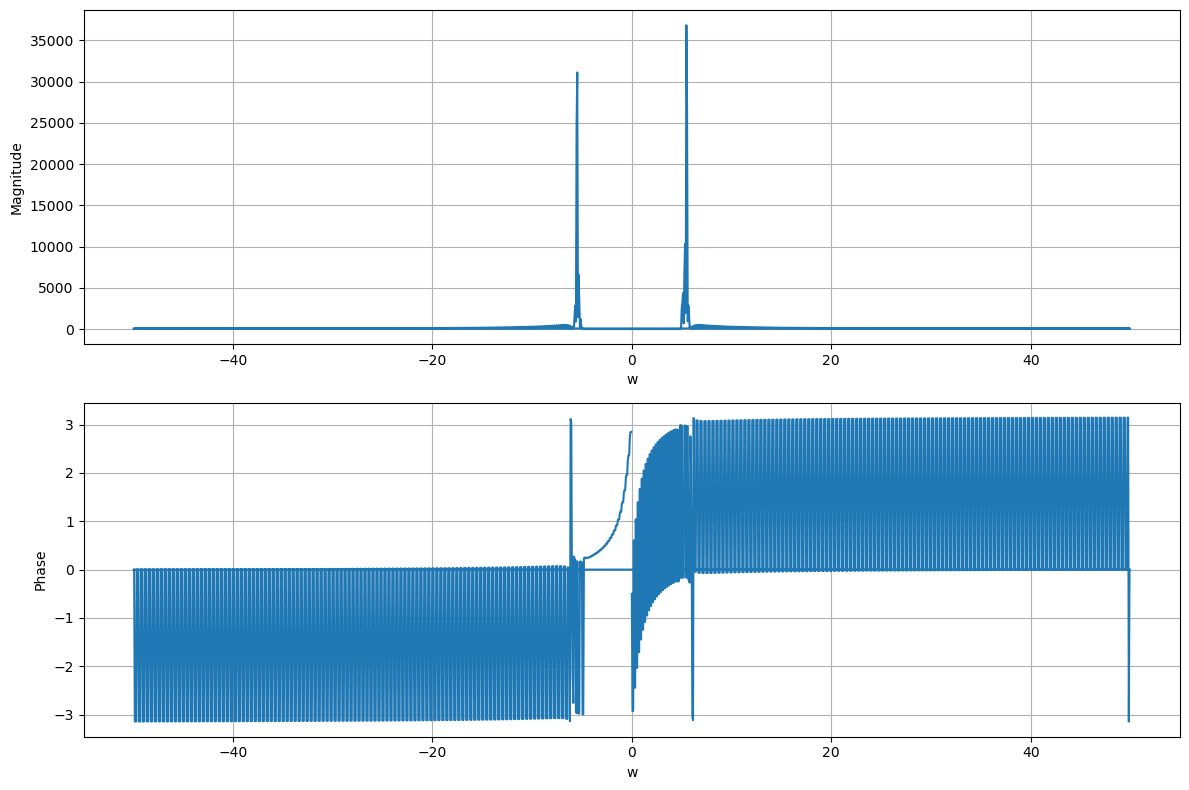

In [151]:
y = np.convolve(x, h5)
Y, wy = dft(y)

plt.figure(figsize=(12, 8))

plt.subplot(211)
plt.plot(wy * fs, np.abs(Y))
plt.ylabel("Magnitude")
plt.xlabel("w")
#plt.text(5.5, 15000, "f2=5.5")
#plt.text(5.0, 40000, "f1=5.0")
plt.grid()

plt.subplot(212)
plt.plot(wy * fs, np.angle(Y))
plt.ylabel("Phase")
plt.xlabel("w")
plt.grid()

plt.tight_layout()
plt.show()

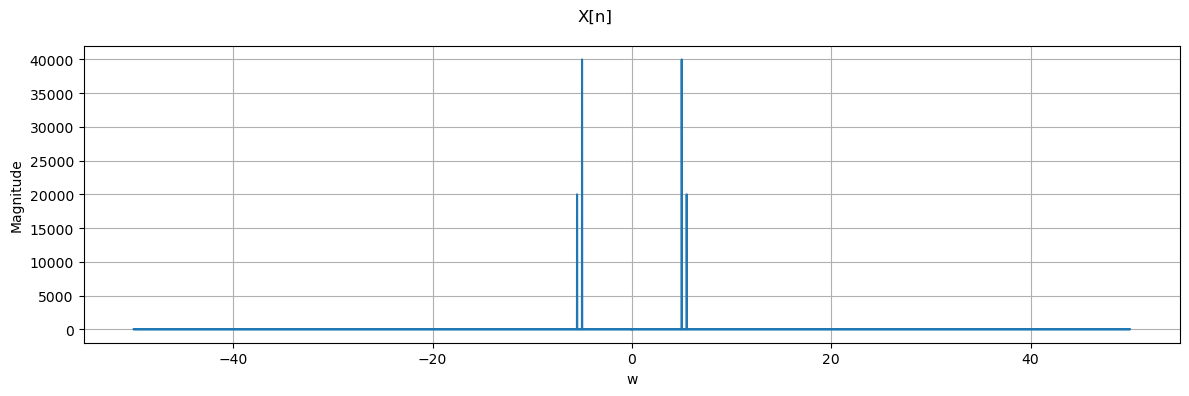

In [168]:
T = 0.01
fs = 100
t = np.linspace(-5000 * T, 4999 * T, 10000 )
A1 = 8
A2 = 4
f1 = 5
f2 = 5.5
x = A1 * np.cos(2 * np.pi * f1 * t) + A2 * np.cos(2 * np.pi * f2 * t)

num_blocks = 5
block_length = 2000
blocks = [x[i * block_length:(i + 1) * block_length] for i in range(num_blocks)]

for i, block in enumerate(blocks):
    X, w = dft(block)
    # plt.figure(figsize=(12, 4))

    # plt.plot(w * fs, np.abs(X))
    # plt.ylabel("Magnitude")
    # plt.xlabel("w")
    # #plt.text(5.5, 150000, "f2=5.5")
    # #plt.text(5.0, 400000, "f1=5.0")
    # plt.grid()

 
    # plt.tight_layout()
    # plt.show()
X, w = dft(x)
plt.figure(figsize=(12, 4))
plt.suptitle("X[n]")

plt.plot(w * fs, np.abs(X))
plt.ylabel("Magnitude")
plt.xlabel("w")
#plt.text(5.5, 150000, "f2=5.5")
#plt.text(5.0, 400000, "f1=5.0")
plt.grid()


plt.tight_layout()
plt.show()







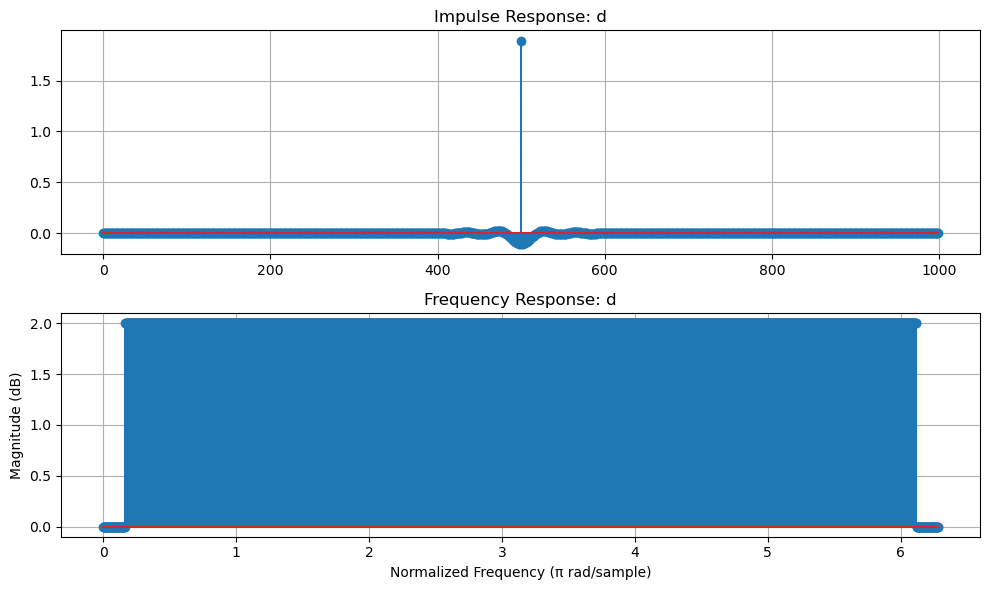

In [155]:
N_samples = 2000
H5, w5 = design_highpass_freq_response(5.25 / fs * np.pi, N_samples, 2, 0)
h5, n5 = idft(H5, w5)
M = 1000
mid = len(h5) // 2
h5 = h5[mid - M // 2 : mid + M // 2]
n5 = n5[mid - M // 2 : mid + M // 2]
h5 *= kaiser_window(M)
plot_time_and_freq(h5, H5, "d")

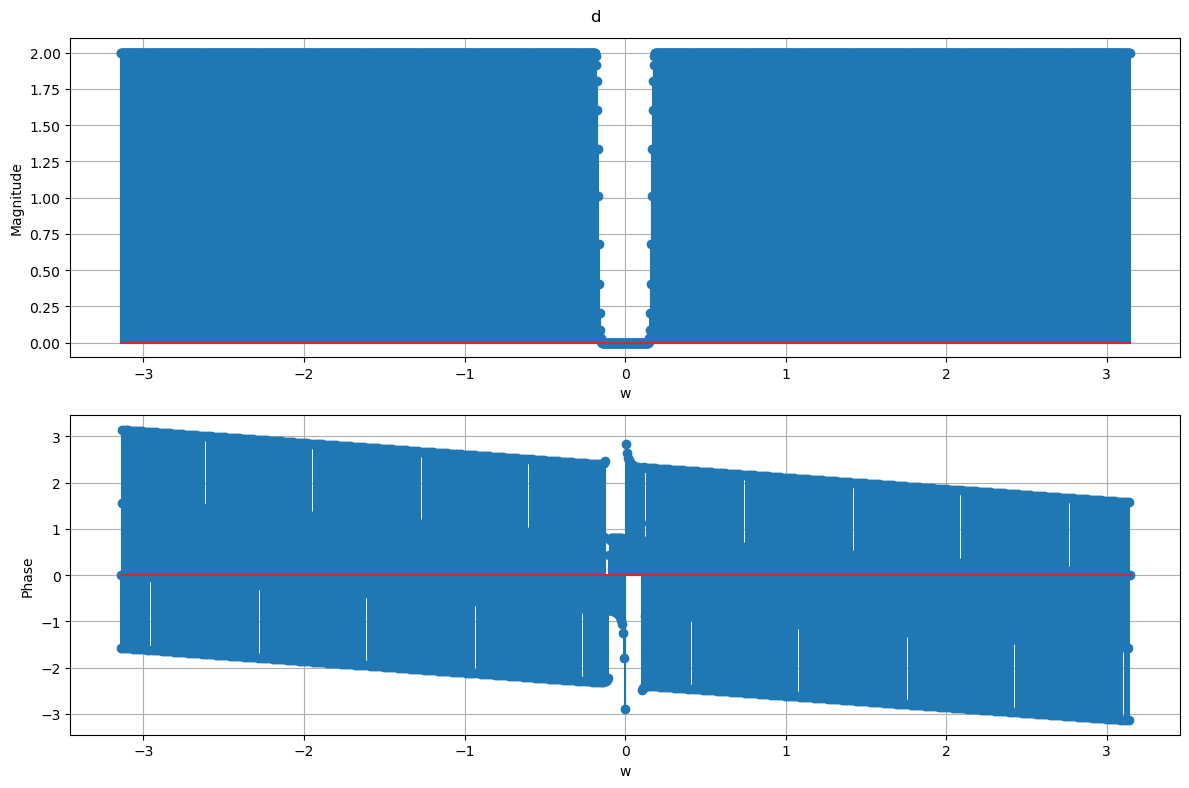

In [156]:
# a5 = np.zeros(N_samples)
# a5[0] = 1
a5 = [1]
H_frf5, w5 = my_freqz(h5, a5, N_samples)
plot_OneSignal_MagAndPha(w5, H_frf5, "d")

In [160]:
y_full_length = len(x) + len(h5) - 1 
ty = np.linspace(-5000 * T, -5000 * T + (y_full_length - 1) * T, y_full_length)
y = np.zeros(y_full_length, dtype=complex) 
y[0] = 0
y1 = np.zeros(len(x), dtype=complex)
y1[0] = 0
ty1 = np.linspace(-5000 * T, -5000 * T + (len(x) - 1) * T, len(x))

for i, block in enumerate(blocks):
    filtered_block = np.convolve(block, h5)  # mode='full'
    
    start_index = i * block_length
    y[start_index : start_index + len(filtered_block)] += filtered_block
    y1[start_index : start_index + block_length] += filtered_block[:block_length]

    #plt.plot(y)
    #plt.show()

    Y, wy = dft(filtered_block)

    # plt.figure(figsize=(12, 8))

    # plt.subplot(211)
    # plt.plot(wy * fs, np.abs(Y))
    # plt.ylabel("Magnitude")
    # plt.xlabel("w")
    # #plt.text(5.5, 15000, "f2=5.5")
    # #plt.text(5.0, 40000, "f1=5.0")
    # plt.grid()

    # plt.subplot(212)
    # plt.plot(wy * fs, np.angle(Y))
    # plt.ylabel("Phase")
    # plt.xlabel("w")
    # plt.grid()

    # plt.tight_layout()
    # plt.show()
print(y.shape)

(10999,)


f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
f:\anaconda3\envs\prp\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


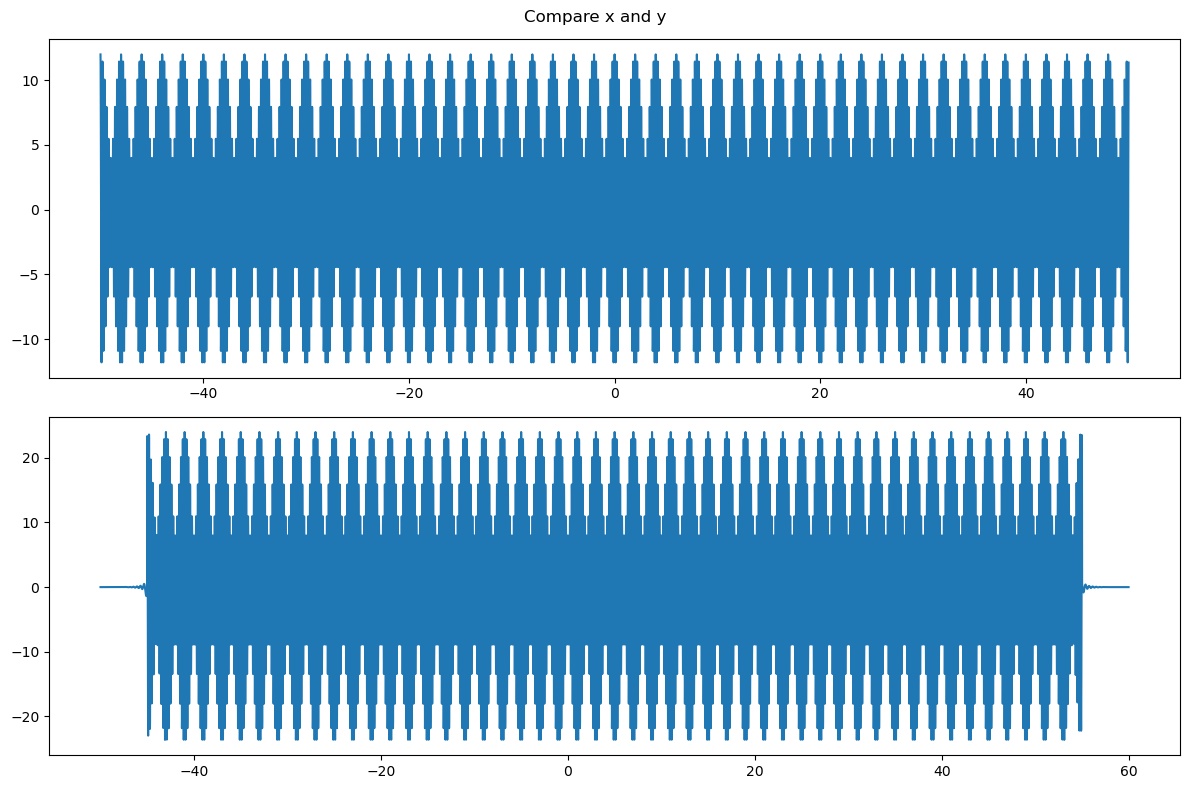

In [165]:
plt.figure(figsize=(12, 8))

plt.suptitle("Compare x and y")
plt.subplot(211)
plt.plot(t, x)

plt.subplot(212)
plt.plot(ty, y)

plt.tight_layout()
plt.show()

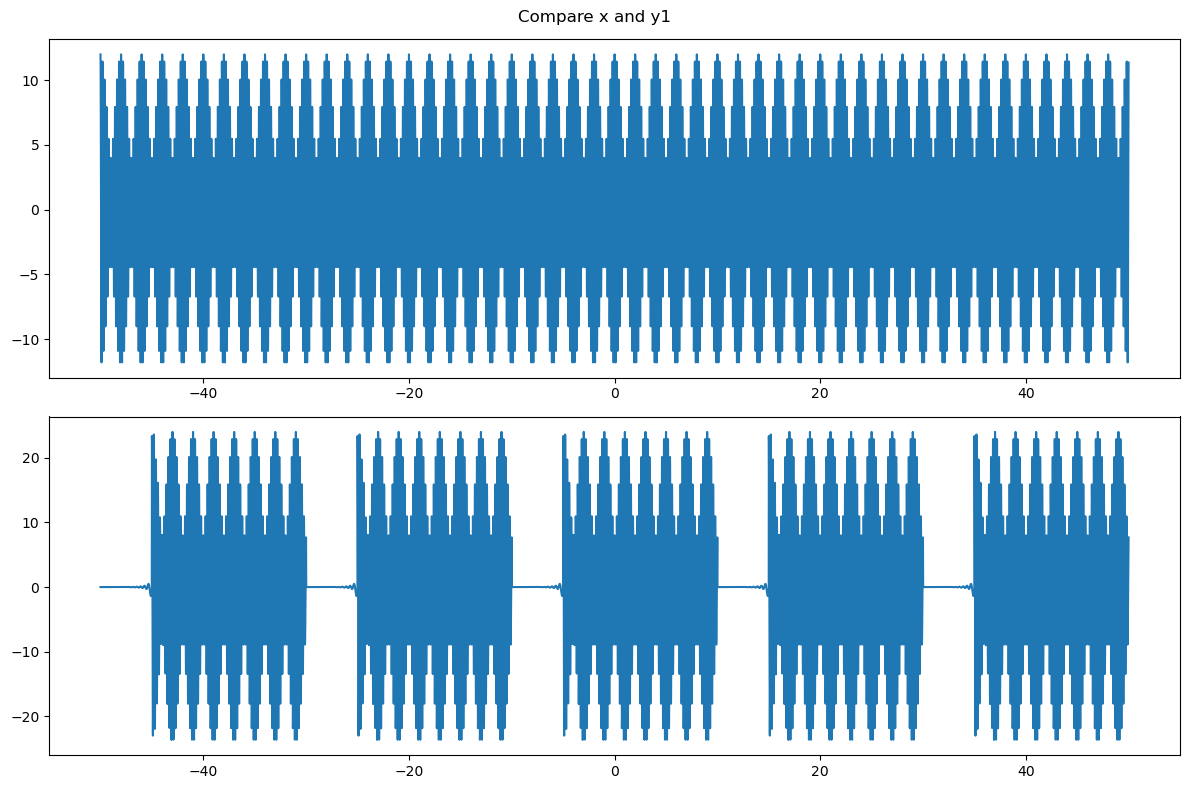

In [166]:
plt.figure(figsize=(12, 8))


plt.suptitle("Compare x and y1")

plt.subplot(211)
plt.plot(t, x)

plt.subplot(212)
plt.plot(ty1, y1)

plt.tight_layout()
plt.show()

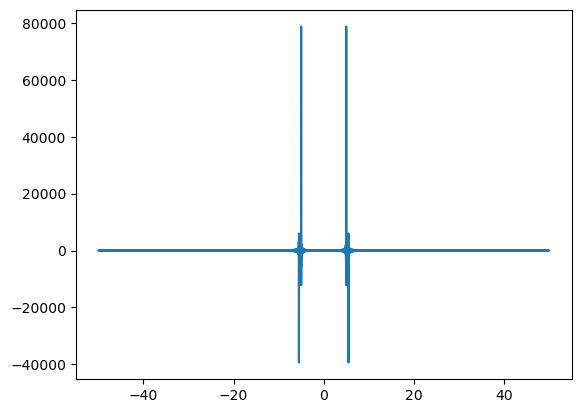

In [164]:
Y, wy = dft(y)

plt.plot(wy * fs, Y)